In [1]:
import numpy as np
import h5py
import glob, os, re, sys
import time

import pickle
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from ArtistNames_analysis import ArtistNames

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
cmap = mpl.colormaps['viridis']
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

# analysis for 1000 random artists

In [4]:
start_time = time.time()
data = ArtistNames(rand_num_artist_names=100, random_seed=42)
print(f"Time to load data: {time.time() - start_time}")

Time to load data: 4.44638729095459


dict_keys(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release', 'last_release', 'num_releases', 'num_tracks'])
['Emir Kusturica & The No Smoking Orchestra', 'Bootychaaain', 'Bootsy Collins', 'Borrtex', 'Bootie Brown', 'Clutch', 'Emie', 'Orko', 'Omar Courtz', 'Collections Of Colonies Of Bees', 'Vladimir Fedoseyev', 'Ballroom Jazz Collective', 'The Collective', 'Vladimir Feltsman', 'The Jazz Collective', 'Vladimir Ashkenazy', 'Dmitry Yablonsky', 'Vladimir Horowitz', 'Cocktails & Jazz', 'The Cooltrane Quartet', 'MGMT', 'Beastie Boys', 'TOOL', 'Korn', 'Djo', 'Creed', 'Caamp', 'JID', 'Lauv', 'Zedd', 'ABBA', 'Pouya', 'Dr. Fresch', 'Frankenstein World Premiere Cast', 'DR. GABBA', 'Wardruna', 'Glenn Gatsby', 'Michael Frankenberger', 'The Edgar Winter Group', 'Glen Hansard', 'Glenn Miller', 'Glen Campbell', 'Kirk Franklin', 'Julian Casablancas', 'AURORA', 'Julian Jordan', 'Julian Lage', 'Borrtex', 'James Hype', 'Mujo', 'Julian Perretta', 'pH-1', 'Julia Church', 'AronChupa', 'Ar

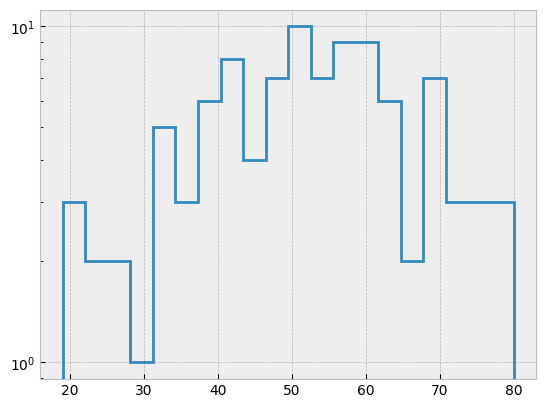

In [5]:
print(data.artist_info.keys())
print(data.artist_info['names'])
print(data.artist_info['followers'])
plt.hist(data.artist_info['popularity'], bins=20, histtype='step', lw=2, log=True)
plt.show()

/tmp/ipykernel_1822799/3462160960.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(data.artist_info['followers']), data.artist_info['popularity'])


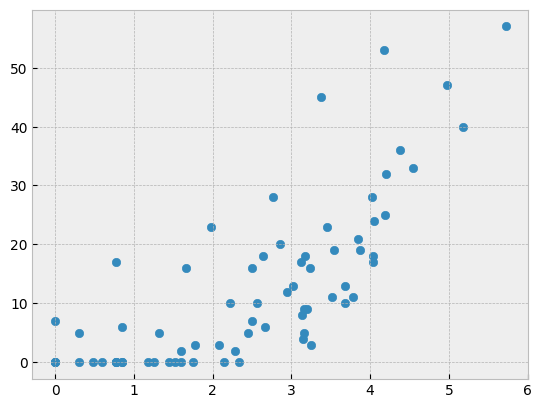

In [17]:
plt.scatter(np.log10(data.artist_info['followers']), data.artist_info['popularity'])
plt.show()

In [13]:
print(data.artist_info['num_releases'])
active_artist_data = data.get_active_artists()
print(active_artist_data['popularity'])

[15, 12, 6, 20, 4, 7, 12, 20, 9, 7, 4, 8, 10, 9, 4, 1, 4, 5, 18, 0, 1, 0, 2, 1, 20, 1, 0, 6, 1, 0, 3, 20, 20, 4, 2, 20, 6, 9, 7, 0, 7, 0, 5, 13, 0, 1, 0, 20, 5, 1, 6, 0, 1, 18, 1, 2, 1, 0, 7, 0, 0, 3, 2, 5, 2, 0, 0, 20, 20, 0, 2, 1, 20, 20, 2, 16]


TypeError: '>' not supported between instances of 'NoneType' and 'int'